In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from IPython.display import Image
from sklearn import metrics
import random

In [4]:
face_embeddings = pd.read_pickle('faces_leg55_embeddings.pkl')

In [5]:
face_embeddings.shape

(8638, 4)

## Quantity of Pictures Histogram

In [6]:
qtd_images = face_embeddings[["name", "file"]].groupby('name').count()
qtd_images.describe()

,file
count,514.000000
mean,16.805447
std,6.446140
min,1.000000
25%,12.000000
50%,17.000000
75%,22.000000
max,31.000000


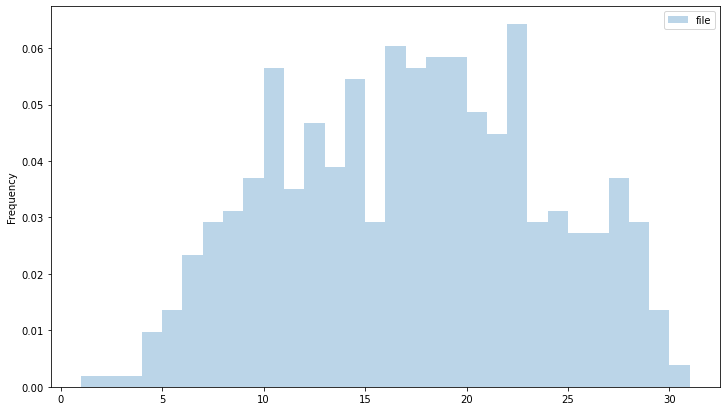

In [7]:
qtd_images.plot.hist(alpha=0.3, density = True, figsize=(12,7), bins=30)

## Selecting People

In [8]:
people = qtd_images.index.values
len(people)

514

random.shuffle(people)
people = people[:25]
people

face_embeddings = face_embeddings.loc[face_embeddings['name'].isin(people)]

## Features Separation

In [9]:
features = pd.DataFrame(face_embeddings['embeddings'].values.tolist(), index = face_embeddings.index)

In [10]:
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1.324466,0.590479,4.177269,0.794232,1.154053,0.189766,0.326489,0.063237,0.000000,0.184393,...,0.000000,0.176240,0.219538,9.977808,0.215569,0.000000,3.782899,1.052073,1.492542,0.000000
1,0.002210,1.062065,3.593089,0.046138,0.727612,0.000000,0.066200,0.275549,0.135222,0.578179,...,0.441180,4.045145,14.904554,1.481576,1.184693,0.172527,0.459387,0.045941,0.071523,0.026189
2,0.317011,1.805298,1.743578,7.373654,0.195877,0.012363,0.241778,0.123456,0.000000,0.258348,...,0.371176,0.747173,6.599727,3.803473,2.865514,0.000000,2.840656,0.000000,0.136122,0.000000
3,0.611791,2.538343,0.000000,0.035358,0.512663,0.840032,0.154486,0.000000,0.000000,2.098919,...,0.194207,0.000000,0.244555,7.622066,1.536317,0.000000,7.341623,0.084740,1.659206,0.000000
4,0.089856,2.015731,6.539081,1.612788,1.004490,0.000000,0.015355,0.000000,0.000000,0.000000,...,0.000000,0.225222,0.257106,5.957454,0.025167,0.043443,0.770127,0.237715,0.113750,0.000000


## Scaling

In [11]:
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)

In [12]:
features_scaled

array([[7.76573976e-02, 2.76238480e-02, 2.69832536e-01, ...,
        4.67726999e-02, 8.09458319e-02, 0.00000000e+00],
       [1.29598137e-04, 4.96856445e-02, 2.32097148e-01, ...,
        2.04244080e-03, 3.87895902e-03, 9.81149876e-04],
       [1.85872895e-02, 8.44556604e-02, 1.12627204e-01, ...,
        0.00000000e+00, 7.38238785e-03, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 4.28247489e-04, ...,
        2.01022656e-01, 1.26232726e-02, 3.04610079e-04],
       [0.00000000e+00, 3.64220977e-04, 0.00000000e+00, ...,
        3.22544733e-03, 7.68389669e-02, 1.60825482e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.59605087e-03, 0.00000000e+00]])

## Silhuoette Analysis

Look for elbow evaluation

https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

import silhouette_paulo

silhouette_values = silhouette_paulo.analyze(features_scaled, [i+2 for i in range(len(people)*2)], show_individual_graphs = False)

## Clustering
See k-means in tensorflow:  https://www.tensorflow.org/api_docs/python/tf/compat/v1/estimator/experimental/KMeans

In [13]:
model = KMeans(n_clusters=514, verbose = 0, random_state=42)

In [14]:
cluster_labels = model.fit_predict(features_scaled)

In [15]:
features['Cluster'] = cluster_labels
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Cluster
0,1.324466,0.590479,4.177269,0.794232,1.154053,0.189766,0.326489,0.063237,0.000000,0.184393,...,0.176240,0.219538,9.977808,0.215569,0.000000,3.782899,1.052073,1.492542,0.000000,149
1,0.002210,1.062065,3.593089,0.046138,0.727612,0.000000,0.066200,0.275549,0.135222,0.578179,...,4.045145,14.904554,1.481576,1.184693,0.172527,0.459387,0.045941,0.071523,0.026189,149
2,0.317011,1.805298,1.743578,7.373654,0.195877,0.012363,0.241778,0.123456,0.000000,0.258348,...,0.747173,6.599727,3.803473,2.865514,0.000000,2.840656,0.000000,0.136122,0.000000,149
3,0.611791,2.538343,0.000000,0.035358,0.512663,0.840032,0.154486,0.000000,0.000000,2.098919,...,0.000000,0.244555,7.622066,1.536317,0.000000,7.341623,0.084740,1.659206,0.000000,16
4,0.089856,2.015731,6.539081,1.612788,1.004490,0.000000,0.015355,0.000000,0.000000,0.000000,...,0.225222,0.257106,5.957454,0.025167,0.043443,0.770127,0.237715,0.113750,0.000000,149


## Analyzing Clusters

In [ ]:
features_names = features.copy()

In [ ]:
features_names['name'] = face_embeddings['name']

In [ ]:
people_clusters = features_names[['name', 'Cluster']].copy()

In [ ]:
people_clusters['qtd'] = cluster_labels

In [ ]:
qtd_clusters = people_clusters.groupby(['Cluster', 'name']).count()
qtd_clusters.head()

In [ ]:
qtd_clusters = people_clusters.groupby(['name','Cluster']).count()
qtd_clusters.head()

In [ ]:
qtd_clusters.sum()

## Evaluation Classification
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [ ]:
dt_eval = features_names[['Cluster', 'name']].copy()

In [ ]:
dt_eval.shape

In [ ]:
labels_true = dt_eval['name'].values


In [ ]:
labels_pred = dt_eval['Cluster'].values

In [ ]:
metrics.homogeneity_score(labels_true,labels_pred)

In [ ]:
metrics.completeness_score(labels_true, labels_pred)

In [ ]:
metrics.v_measure_score(labels_true, labels_pred)